In [2]:
# Importing libraries
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [4]:
# load audio file ("Normal fan")
y, sr = librosa.load('/home/ms/Desktop/sound-anomaly-detection//00000001_-6dB_normal_fan_00.wav')

In [5]:
import IPython.display as ipd
file_name = '/home/ms/Desktop/codit_project/00000001_-6dB_normal_fan_00.wav'
ipd.Audio(file_name)

ValueError: rate must be specified when data is a numpy array or list of audio samples.

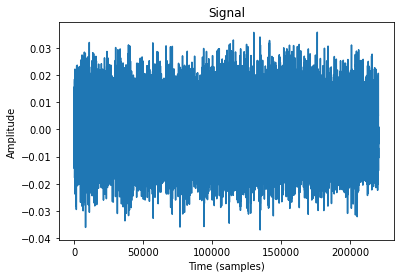

In [6]:
# Plot of the audio signal
plt.plot(y)
plt.title('Signal')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude');

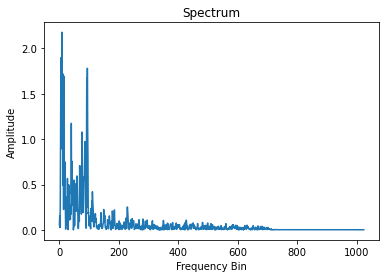

In [7]:
# FFT
import numpy as np
n_fft = 2048
ft = np.abs(librosa.stft(y[:n_fft], hop_length = n_fft+1))
plt.plot(ft);
plt.title('Spectrum')
plt.xlabel('Frequency Bin')
plt.ylabel('Amplitude');

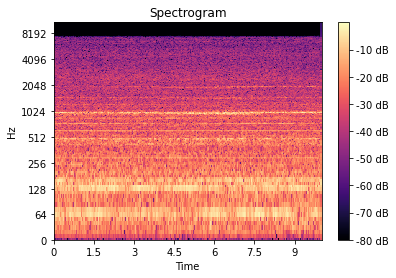

In [9]:
# Spectogram
spec = np.abs(librosa.stft(y, hop_length=512))
spec = librosa.amplitude_to_db(spec, ref=np.max)
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram');

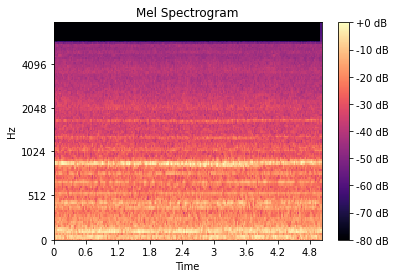

In [10]:
# Mel spectrogram

mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)

librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram')
plt.colorbar(format='%+2.0f dB');


In [107]:
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect 

array([[1.94363892e-02, 4.19393368e-02, 4.08685356e-02, ...,
        1.75777636e-02, 2.78648324e-02, 6.69289306e-02],
       [1.86003491e-01, 9.50517431e-02, 4.48246866e-01, ...,
        4.37685773e-02, 1.13931268e-01, 8.62260982e-02],
       [2.38610387e-01, 1.37118667e-01, 3.27491313e-01, ...,
        6.80871159e-02, 1.23352125e-01, 7.45238736e-02],
       ...,
       [4.14627209e-07, 3.00187497e-16, 2.43548919e-16, ...,
        2.28207749e-16, 4.49100204e-16, 1.00554917e-06],
       [4.05459616e-07, 2.94051538e-16, 2.81830996e-16, ...,
        2.19253115e-16, 2.61933001e-16, 9.74338150e-07],
       [3.99684751e-07, 3.33052720e-16, 2.47263290e-16, ...,
        2.70278128e-16, 1.85432360e-16, 9.55184078e-07]], dtype=float32)

In [116]:
np.mean(mel_spect)

0.019136121

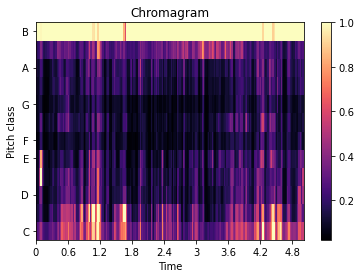

In [11]:
# .chroma_stft

# Compute a chromagram from a waveform or power spectrogram.


# librosa.feature.chroma_stft(y=y, sr=sr)


#Use an energy (magnitude) spectrum instead of power spectrogram
S = np.abs(librosa.stft(y)) 

chroma = librosa.feature.chroma_stft(S=S, sr=sr)

# Use a pre-computed power spectrogram with a larger frame
S = np.abs(librosa.stft(y, n_fft=4096))**2

chroma = librosa.feature.chroma_stft(S=S, sr=sr)

#Plot
fig, ax = plt.subplots()

img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)

fig.colorbar(img, ax=ax)

ax.set(title='Chromagram');

In [108]:
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
chroma

array([[0.38840875, 0.2671115 , 0.29955956, ..., 0.6634748 , 0.5433175 ,
        0.55750346],
       [0.19374499, 0.13559075, 0.14418149, ..., 0.52362996, 0.40972438,
        0.27861482],
       [0.15750529, 0.0960473 , 0.10639374, ..., 0.53206044, 0.25715575,
        0.4493816 ],
       ...,
       [0.29290867, 0.1180864 , 0.10346606, ..., 0.26621437, 0.1675414 ,
        0.20460914],
       [0.3000901 , 0.18498431, 0.20605123, ..., 0.26712796, 0.23713739,
        0.26114377],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]], dtype=float32)

In [117]:
np.mean(chroma)

0.2826836

In [13]:
# .chroma_cqt

# Constant-Q chromagram

# Ex.: Compare a long-window STFT chromagram to the CQT chromagram

chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr,

                                          n_chroma=12, n_fft=4096)

chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr)

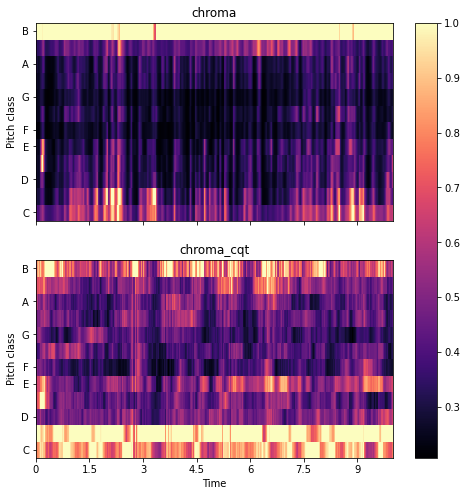

In [14]:
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(8,8))

librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time', ax=ax[0])

ax[0].set(title='chroma')

ax[0].label_outer()

img = librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time', ax=ax[1])

ax[1].set(title='chroma_cqt')

fig.colorbar(img, ax=ax);

In [109]:
chroma_stft

array([[0.38014874, 0.32023618, 0.26070708, ..., 0.5356336 , 0.52658886,
        0.54661584],
       [0.19291033, 0.16410282, 0.1352021 , ..., 0.40641794, 0.31275287,
        0.2778368 ],
       [0.156699  , 0.12870416, 0.09564231, ..., 0.2559047 , 0.27678132,
        0.44965407],
       ...,
       [0.2927978 , 0.20844083, 0.11780293, ..., 0.16604511, 0.15531288,
        0.20269631],
       [0.30122378, 0.24218328, 0.1887398 , ..., 0.23991258, 0.23302528,
        0.26270226],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]], dtype=float32)

In [118]:
np.mean(chroma_stft)

0.28251532

In [110]:
chroma_cq

array([[0.8206855 , 0.8200112 , 0.80431855, ..., 0.69486207, 0.69736445,
        0.77600163],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.43254793, 0.44786444, 0.49634525, ..., 0.5764409 , 0.5967206 ,
        0.6473979 ],
       ...,
       [0.6732787 , 0.6390046 , 0.5922187 , ..., 0.3052364 , 0.31756338,
        0.35027575],
       [0.7824969 , 0.71420443, 0.6922154 , ..., 0.39261797, 0.39227015,
        0.44415703],
       [0.4854813 , 0.6359651 , 0.83756465, ..., 0.56480116, 0.6496927 ,
        0.5788953 ]], dtype=float32)

In [119]:
np.mean(chroma_cq)

0.5533795

In [94]:
# .chroma_cens
# Computes the chroma variant “Chroma Energy Normalized” (CENS)

# Ex: Compare standard cqt chroma to CENS

chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)

chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr)

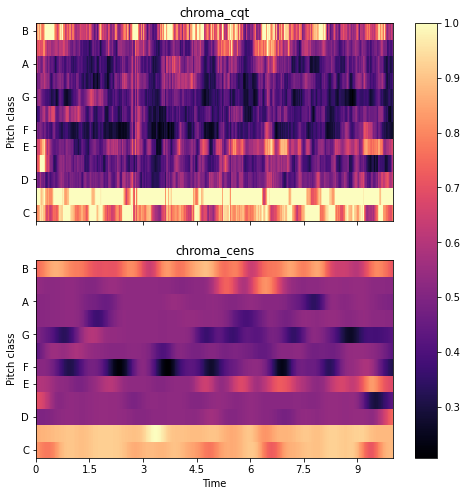

In [95]:
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(8,8))

img = librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time', ax=ax[0])

ax[0].set(title='chroma_cqt')

ax[0].label_outer()

librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time', ax=ax[1])

ax[1].set(title='chroma_cens')

fig.colorbar(img, ax=ax);

In [111]:
chroma_cens

array([[0.42011825, 0.41582106, 0.41164817, ..., 0.45023982, 0.45010568,
        0.44974232],
       [0.44065802, 0.44090321, 0.44124853, ..., 0.45033675, 0.45010568,
        0.44974232],
       [0.21106247, 0.21057509, 0.21022827, ..., 0.35521034, 0.3612449 ,
        0.36699651],
       ...,
       [0.22032901, 0.2204516 , 0.22062426, ..., 0.21012743, 0.20982196,
        0.20953904],
       [0.24035892, 0.23872848, 0.23725393, ..., 0.22516838, 0.22505284,
        0.22487116],
       [0.3597703 , 0.36299553, 0.36640764, ..., 0.35126011, 0.34622752,
        0.34100328]])

In [120]:
np.mean(chroma_cens)

0.269918195603179

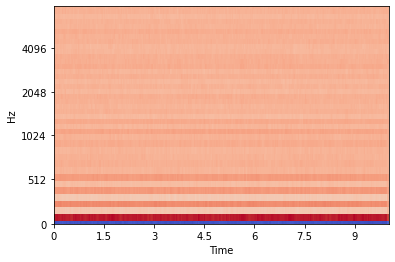

In [105]:
# .mfcc
# Mel-frequency cepstral coefficients (MFCCs)

mel_spect = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40) # Return a two-dimensional matrix of shape=(n_mfcc, timestep)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time')

In [115]:
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
mfcc

array([[-369.32233  , -370.34216  , -379.54263  , ..., -378.6736   ,
        -380.73175  , -359.62946  ],
       [ 144.4719   ,  152.72943  ,  163.03836  , ...,  167.69046  ,
         165.3109   ,  138.34525  ],
       [ -14.579216 ,  -24.643467 ,  -37.544777 , ...,  -37.224224 ,
         -38.490868 ,  -12.750306 ],
       ...,
       [  -6.2677584,   -9.313732 ,  -11.4281225, ...,   -8.923555 ,
          -9.485125 ,   -7.7068167],
       [  -3.9465325,   -1.8293176,   -1.7815843, ...,    2.4401212,
           2.4440627,    0.8944247],
       [  -4.2548804,   -2.9315696,   -1.4713166, ...,    3.8383608,
           1.3097736,    1.6997733]], dtype=float32)

In [121]:
np.mean(mfcc)

-5.685199

/home/ms/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ms/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ms/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


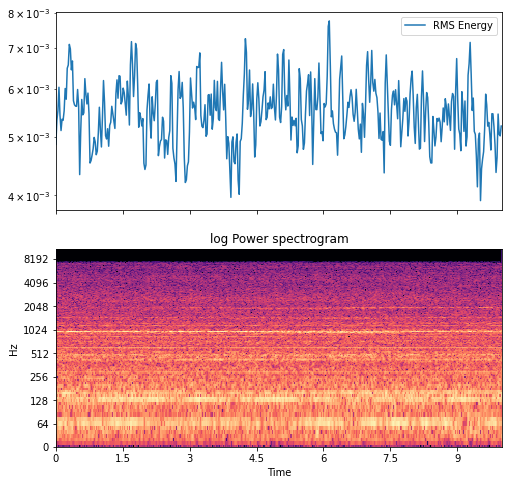

In [141]:
# .rms
# Compute root-mean-square (RMS) value for each frame, either from the audio samples y or from a spectrogram S.

S, phase = librosa.magphase(librosa.stft(y))

rms = librosa.feature.rms(S=S)

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(8,8))

times = librosa.times_like(rms)

ax[0].semilogy(times, rms[0], label='RMS Energy')

ax[0].set(xticks=[])

ax[0].legend()

ax[0].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),

                         y_axis='log', x_axis='time', ax=ax[1])

ax[1].set(title='log Power spectrogram');

In [142]:
rms = librosa.feature.rms(y=y)
np.mean(rms)

0.009026037

In [15]:
# .spectral_centroid
# Compute the spectral centroid.

S, phase = librosa.magphase(librosa.stft(y=y))

times = librosa.times_like(cent)

fig, ax = plt.subplots(figsize=(8,8))

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),

                         y_axis='log', x_axis='time', ax=ax)

ax.plot(times, cent.T, label='Spectral centroid', color='w')

ax.legend(loc='upper right')

ax.set(title='log Power spectrogram');

NameError: name 'cent' is not defined

In [144]:
cent = librosa.feature.spectral_centroid(y=y, sr=sr)

np.mean(cent)

2638.421345242211

/home/ms/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ms/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ms/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


ValueError: operands could not be broadcast together with shapes (431,) (230,) 

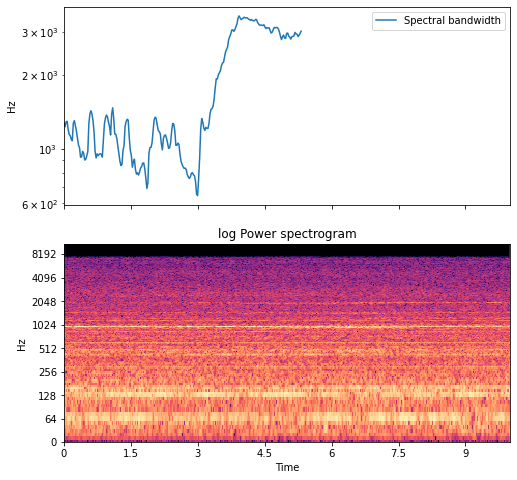

In [147]:
# .spectral_bandwidth
# Compute p’th-order spectral bandwidth.

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(8,8))

times = librosa.times_like(spec_bw)

centroid = librosa.feature.spectral_centroid(S=S)

ax[0].semilogy(times, spec_bw[0], label='Spectral bandwidth')

ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])

ax[0].legend()

ax[0].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),

                         y_axis='log', x_axis='time', ax=ax[1])

ax[1].set(title='log Power spectrogram')

ax[1].fill_between(times, centroid[0] - spec_bw[0], centroid[0] + spec_bw[0],

                alpha=0.5, label='Centroid +- bandwidth')

ax[1].plot(times, centroid[0], label='Spectral centroid', color='w')

ax[1].legend(loc='lower right')

In [145]:
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)

np.mean(spec_bw)

1758.8118606759954

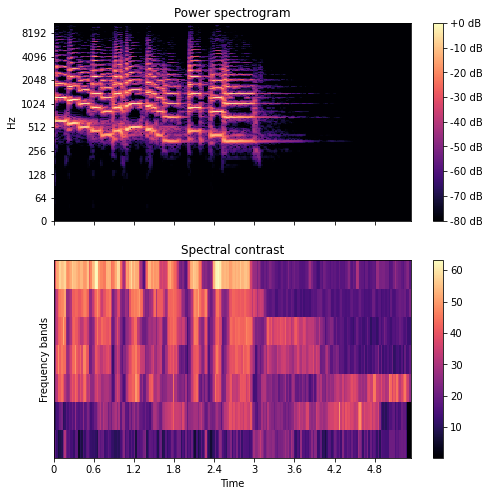

In [150]:
# .spectral_contrast
# Compute spectral contrast

S = np.abs(librosa.stft(y))

contrast = librosa.feature.spectral_contrast(S=S, sr=sr)

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(8,8))

img1 = librosa.display.specshow(librosa.amplitude_to_db(S,

                                                 ref=np.max),

                         y_axis='log', x_axis='time', ax=ax[0])

fig.colorbar(img1, ax=[ax[0]], format='%+2.0f dB')

ax[0].set(title='Power spectrogram')

ax[0].label_outer()

img2 = librosa.display.specshow(contrast, x_axis='time', ax=ax[1])

fig.colorbar(img2, ax=[ax[1]])

ax[1].set(ylabel='Frequency bands', title='Spectral contrast');

In [151]:
contrast = librosa.feature.spectral_contrast(S=S, sr=sr)
np.mean(contrast)

27.892847383168405

In [174]:
contrast

array([[14.89558237, 17.398805  , 12.59424951, ..., 14.90751403,
         0.36065287,  0.15704606],
       [19.17923832, 10.04096498, 14.53982766, ..., 12.19656559,
         1.21877624,  0.70838401],
       [30.48454624, 26.53711475, 31.75345687, ..., 37.94751191,
        34.47760999, 25.22096112],
       ...,
       [28.34557739, 25.69938496, 33.53178787, ..., 17.57644225,
        12.8923101 , 12.92512108],
       [30.72587346, 24.34106251, 34.40720636, ..., 16.27401925,
        17.12307526, 22.23601593],
       [35.67099326, 39.9183213 , 50.96255926, ..., 22.8353572 ,
        24.18294684, 17.60212153]])

In [153]:
# .spectral_flatness
# Compute spectral flatness

flatness = librosa.feature.spectral_flatness(y=y)

np.mean(flatness)

0.05257984

/home/ms/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ms/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ms/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


[Text(0.5, 1.0, 'log Power spectrogram')]

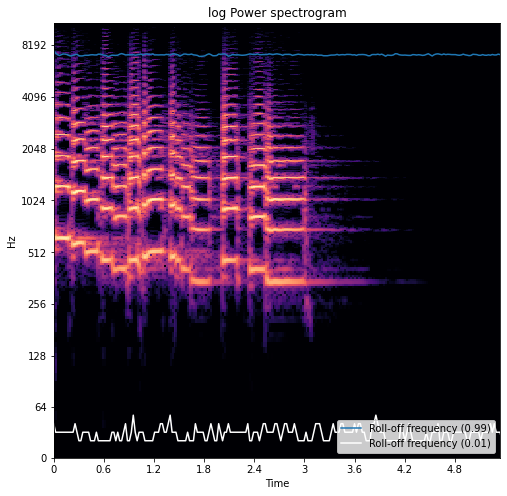

In [162]:
# .spectral_rolloff
# Compute roll-off frequency.


# Approximate maximum frequencies with roll_percent=0.99

rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.99)


# Approximate minimum frequencies with roll_percent=0.01

rolloff_min = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.01)


fig, ax = plt.subplots(figsize=(8,8))

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),

                         y_axis='log', x_axis='time', ax=ax)

ax.plot(librosa.times_like(rolloff), rolloff[0], label='Roll-off frequency (0.99)')

ax.plot(librosa.times_like(rolloff), rolloff_min[0], color='w',

        label='Roll-off frequency (0.01)')

ax.legend(loc='lower right')

ax.set(title='log Power spectrogram')

In [163]:
np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.95))

5655.68830662703

/home/ms/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ms/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ms/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


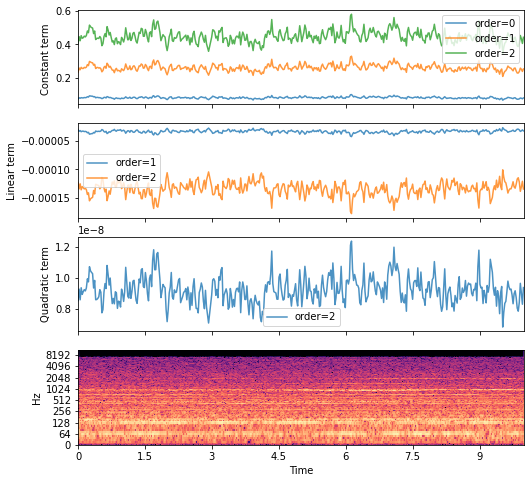

In [164]:
# .poly_features
# Get coefficients of fitting an nth-order polynomial to the columns of a spectrogram.

S = np.abs(librosa.stft(y))

p0 = librosa.feature.poly_features(S=S, order=0)

p1 = librosa.feature.poly_features(S=S, order=1)

p2 = librosa.feature.poly_features(S=S, order=2)


fig, ax = plt.subplots(nrows=4, sharex=True, figsize=(8, 8))

times = librosa.times_like(p0)

ax[0].plot(times, p0[0], label='order=0', alpha=0.8)

ax[0].plot(times, p1[1], label='order=1', alpha=0.8)

ax[0].plot(times, p2[2], label='order=2', alpha=0.8)

ax[0].legend()

ax[0].label_outer()

ax[0].set(ylabel='Constant term ')

ax[1].plot(times, p1[0], label='order=1', alpha=0.8)

ax[1].plot(times, p2[1], label='order=2', alpha=0.8)

ax[1].set(ylabel='Linear term')

ax[1].label_outer()

ax[1].legend()

ax[2].plot(times, p2[0], label='order=2', alpha=0.8)

ax[2].set(ylabel='Quadratic term')

ax[2].legend()

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),

                         y_axis='log', x_axis='time', ax=ax[3])

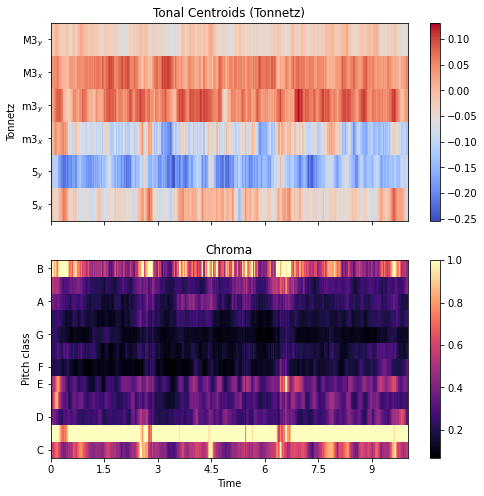

In [170]:
# .tonnetz
# Computes the tonal centroid features (tonnetz)

y = librosa.effects.harmonic(y)

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(8,8))

img1 = librosa.display.specshow(tonnetz,

                                y_axis='tonnetz', x_axis='time', ax=ax[0])

ax[0].set(title='Tonal Centroids (Tonnetz)')

ax[0].label_outer()

img2 = librosa.display.specshow(librosa.feature.chroma_cqt(y, sr=sr),

                                y_axis='chroma', x_axis='time', ax=ax[1])

ax[1].set(title='Chroma')

fig.colorbar(img1, ax=[ax[0]])

fig.colorbar(img2, ax=[ax[1]]);

In [171]:
tonnetz = librosa.feature.tonnetz(y=y, sr=sr)

np.mean(tonnetz)

-0.03062058610471431

In [16]:
# .zero_crossing_rate
# Compute the zero-crossing rate of an audio time series.

np.mean(librosa.feature.zero_crossing_rate(y))

0.06820303436774942

In [17]:
# Onset detection

onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
librosa.frames_to_time(onset_frames, sr=sr)

array([0.06965986, 0.11609977, 0.2554195 , 0.30185941, 0.46439909,
       0.58049887, 0.62693878, 0.69659864, 0.78947846, 0.88235828,
       1.04489796, 1.18421769, 1.27709751, 1.39319728, 1.55573696,
       1.69505669, 1.95047619, 2.06657596, 2.11301587, 2.20589569,
       2.43809524, 2.57741497, 2.62385488, 2.7631746 , 2.90249433,
       2.99537415, 3.06503401, 3.20435374, 3.25079365, 3.43655329,
       3.66875283, 3.80807256, 3.9938322 , 4.22603175, 4.29569161,
       4.38857143, 4.45823129, 4.55111111, 4.69043084, 4.85297052,
       4.89941043, 5.0155102 , 5.08517007, 5.2244898 , 5.27092971,
       5.43346939, 5.66566893, 5.82820862, 5.92108844, 6.01396825,
       6.06040816, 6.15328798, 6.2461678 , 6.40870748, 6.45514739,
       6.54802721, 6.66412698, 6.7570068 , 6.91954649, 7.12852608,
       7.19818594, 7.43038549, 7.50004535, 7.7322449 , 7.84834467,
       7.9876644 , 8.12698413, 8.21986395, 8.26630385, 8.38240363,
       8.54494331, 8.63782313, 8.68426304, 8.77714286, 8.91646

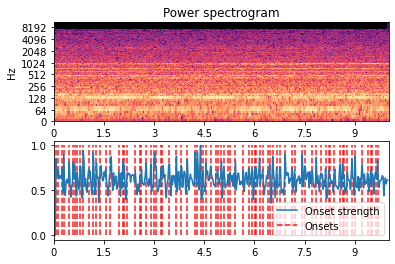

In [19]:
o_env = librosa.onset.onset_strength(y, sr=sr)
times = librosa.frames_to_time(np.arange(len(o_env)), sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

D = librosa.stft(y)
plt.figure()
ax1 = plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         x_axis='time', y_axis='log')
plt.title('Power spectrogram')
plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(times, o_env, label='Onset strength')
plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,
          linestyle='--', label='Onsets')
plt.axis('tight')
plt.legend(frameon=True, framealpha=0.75)